In [1]:
import branca.colormap as cm
import folium
import geopandas as gpd
import numpy as np
import pandas as pd

In [2]:
corona_df = pd.read_csv("dataset/Travel.csv")

In [3]:
corona_df

,Travel history,Travel,Confirmed date
0,Wuhan,1,23/1/2020
1,Wuhan,1,23/1/2020
2,Wuhan,1,24/1/2020
3,Wuhan,1,24/1/2020
4,Wuhan,1,24/1/2020
...,...,...,...
937,USA,1,23/4/2020
938,UK,1,25/4/2020
939,UK,1,25/4/2020
940,Pakistan,1,1/5/2020


In [4]:
countries = gpd.read_file('dataset/Countries_WGS84/Countries_WGS84.shp')

In [5]:
countries

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [6]:
corona_df = corona_df.replace({'Travel history' : 
                      dict.fromkeys(['Wuhan', 
                                     'Mainland China', 
                                     'Hong Kong', 
                                     'Macau'], 
                                     'China')})
corona_df = corona_df.replace({'Travel history' : dict.fromkeys(['US','USA'], 'United States')})
corona_df = corona_df.replace({'Travel history' : 'UK'}, 
                                'United Kingdom')
corona_df = corona_df.replace({'Travel history' : 'North Ireland'}, 
                                'United Kingdom')
corona_df = corona_df.replace({'Travel history' : 'Republic of Ireland'}, 
                                'Ireland')
corona_df = corona_df.replace({'Travel history' : 'Vatican City'}, 
                                'Italy')
countries = countries.replace({'CNTRY_NAME' : 'Byelarus'}, 
                               'Belarus')
countries = countries.replace({'CNTRY_NAME' : 'Macedonia'}, 
                               'North Macedonia')

In [7]:
countries = countries.rename(columns={'CNTRY_NAME': 'Travel history'})

In [8]:
countries

,OBJECTID,Travel history,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [9]:
sorted_df = corona_df.sort_values(['Travel history']).reset_index(drop=True)

In [10]:
sum_df = sorted_df.groupby(['Travel history'], as_index=False).sum()

In [11]:
joined_df = sum_df.merge(countries, on='Travel history')

In [12]:
joined_df

,Travel history,Travel,OBJECTID,geometry
0,Argentina,6,11,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
1,Australia,6,12,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
2,Austria,10,13,"POLYGON ((10.47124 46.87135, 10.48821 46.93599..."
3,Belgium,1,20,"POLYGON ((6.39820 50.32317, 6.34972 50.31277, ..."
4,Bhutan,1,31,"POLYGON ((92.08151 26.86905, 92.06443 26.85972..."
5,Bolivia,7,25,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5..."
6,Brazil,7,30,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
7,Bulgaria,2,32,"POLYGON ((28.01305 41.98222, 27.97110 41.98415..."
8,Canada,32,36,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ..."
9,Chile,5,43,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494..."


In [13]:
joined_df['log_Travel'] = (joined_df['Travel'])

In [14]:
joined_df = joined_df[['Travel history', 'log_Travel', 'geometry']]

In [15]:
joined_df

,Travel history,log_Travel,geometry
0,Argentina,6,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
1,Australia,6,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
2,Austria,10,"POLYGON ((10.47124 46.87135, 10.48821 46.93599..."
3,Belgium,1,"POLYGON ((6.39820 50.32317, 6.34972 50.31277, ..."
4,Bhutan,1,"POLYGON ((92.08151 26.86905, 92.06443 26.85972..."
5,Bolivia,7,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5..."
6,Brazil,7,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
7,Bulgaria,2,"POLYGON ((28.01305 41.98222, 27.97110 41.98415..."
8,Canada,32,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ..."
9,Chile,5,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494..."


In [16]:
joined_df=joined_df.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [17]:
joined_df['centroid_column'] = joined_df.centroid

In [18]:
joined_df = joined_df.set_geometry('centroid_column')


Bad key "text.kerning_factor" on line 4 in
D:\Users\User\anaconda3\envs\tfTest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


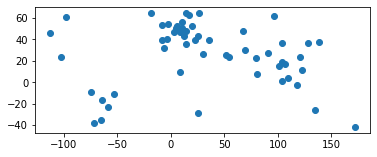

In [19]:
joined_df.plot()

In [20]:
x_map=joined_df.centroid.x
y_map=joined_df.centroid.y
print(x_map,y_map)

0     -65.167683
1     134.489563
2      14.140192
3       4.663989
4      90.429434
5     -64.670595
6     -53.090086
7      25.231507
8     -98.265448
9     -71.373981
10    103.834201
11     10.046297
12     29.871903
13     26.266371
14      2.551955
15     10.393647
16     22.961038
17    -18.605467
18     79.616232
19    117.369087
20     -8.150580
21     12.072368
22    137.990744
23     67.301774
24    103.763291
25      6.087814
26    109.708190
27     14.441921
28   -102.532867
29     -6.317815
30      5.602521
31    171.779902
32      8.105306
33     14.084524
34     69.385966
35    -58.391024
36    -74.375488
37    122.878708
38     19.400884
39     -8.562731
40     51.191201
41     96.691926
42    103.808053
43     25.083266
44    127.834786
45     -3.648461
46     80.704727
47     16.739766
48      8.234392
49    120.950799
50    101.017438
51     35.179593
52     54.335065
53     -2.895584
54   -112.491518
55    106.301171
dtype: float64 0    -35.376184
1    -25.734969
2

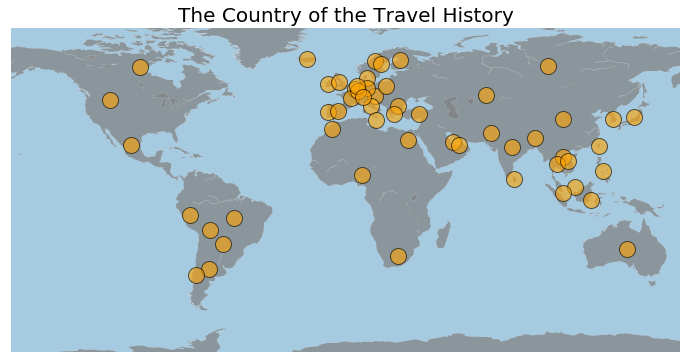

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("The Country of the Travel History", fontsize=20)
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
m.plot(x_map, y_map, linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
